In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

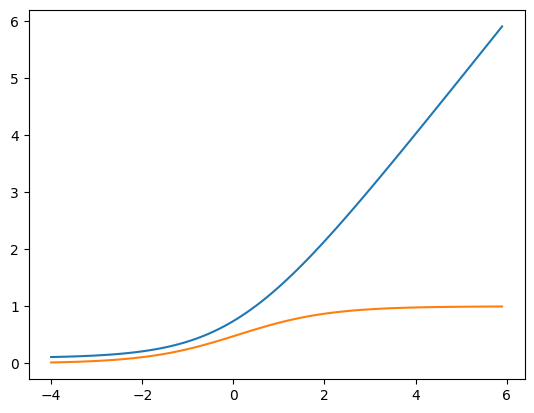

In [47]:
def df(f, x, **kwargs):
    eps = 0.001
    return (f(x + eps, **kwargs) - f(x, **kwargs)) / eps

def f(x):
    return np.log(np.exp(x) + 1.1)

x = np.arange(-5, 5., 0.1) + 1
plt.plot(x, f(x))
plt.plot(x, df(f, x))
plt.show()

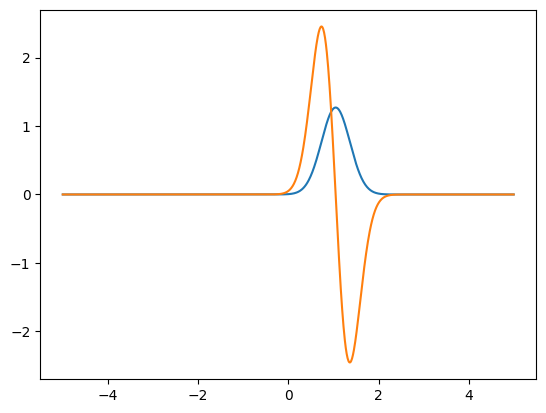

10.000000000000211


In [49]:
def n(x, mu=0, sig=1):
    var = sig#sig ** 2
    return (1/np.sqrt(var * 2 * np.pi)) * np.exp(-(x-mu)**2/(2*var))

mu, sig = 1.0459, 0.0985671
x = np.arange(-5, 5., 0.01)
y = n(x, mu, sig)
plt.plot(x, y)
plt.plot(x, df(n, x, mu=mu, sig=sig))
plt.show()

s = 0
for i, y_i in enumerate(y[1:]):
    dx = 0.1
    s += y_i * dx
print(s)

In [58]:
tbl = pd.read_csv('/tmp/plot17.csv')

In [59]:
tbl

,dpr,gb0,gb1,gw0,gw1,pr,x,Unnamed: 7
0,1,-0.007507,0.002687,0.022520,-0.008060,0.035007,-3.00,NaN
1,1,-0.007873,0.002786,0.023148,-0.008191,0.035936,-2.94,NaN
2,1,-0.008268,0.002890,0.023810,-0.008322,0.036915,-2.88,NaN
3,1,-0.008692,0.002998,0.024511,-0.008455,0.037949,-2.82,NaN
4,1,-0.009149,0.003111,0.025251,-0.008587,0.039042,-2.76,NaN
...,...,...,...,...,...,...,...,...
95,1,0.000000,0.000000,0.000000,0.000000,0.000000,2.70,NaN
96,1,0.000000,0.000000,0.000000,0.000000,0.000000,2.76,NaN
97,1,0.000000,0.000000,0.000000,0.000000,0.000000,2.82,NaN
98,1,0.000000,0.000000,0.000000,0.000000,0.000000,2.88,NaN


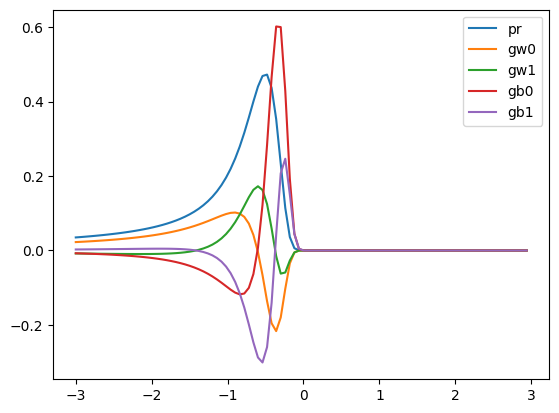

In [61]:
x = tbl['x']
gb0 = tbl['gb0']
gb1 = tbl['gb1']
gw0 = tbl['gw0']
gw1 = tbl['gw1']

pr = tbl['pr']

plt.plot(x, pr, label='pr')
plt.plot(x, gw0, label='gw0')
plt.plot(x, gw1, label='gw1')
plt.plot(x, gb0, label='gb0')
plt.plot(x, gb1, label='gb1')
plt.legend()
plt.show()